# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

df_raw = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df_raw.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Berdasarkan output di atas, didapatkan informasi bahwa dataset Bank Transaction ini memiliki 2512 baris, dan tidak ada baris yang kosong (null). Maka dari itu, dataset bisa langsung dipakai tanpa perlu mengatasi *missing value*.

In [ ]:
df_raw.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [ ]:
# Memeriksa baris kosong per kolom
df_raw.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


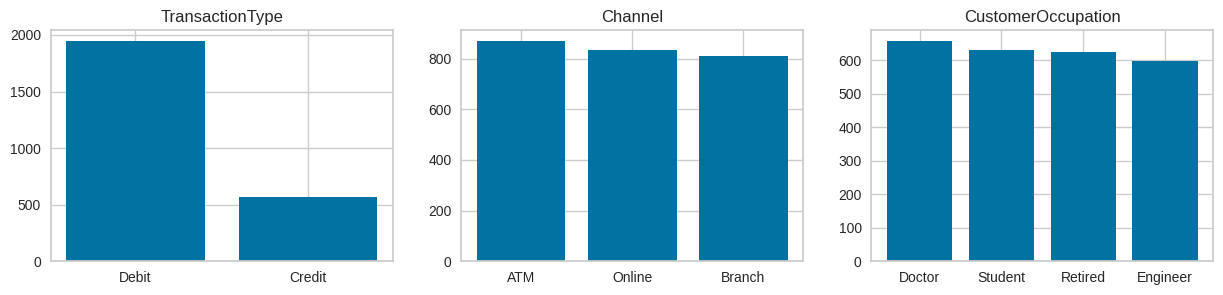

In [ ]:
# Visualisasi Kolom Kategori
cat_cols = ["TransactionType", "Channel", "CustomerOccupation"]

fig, axes = plt.subplots(1, len(cat_cols), figsize=(15,3))

for i, ax in enumerate(axes.reshape(-1)):
  ax.bar(df_raw[cat_cols[i]].unique(), df_raw[cat_cols[i]].value_counts())
  ax.set_title(cat_cols[i])


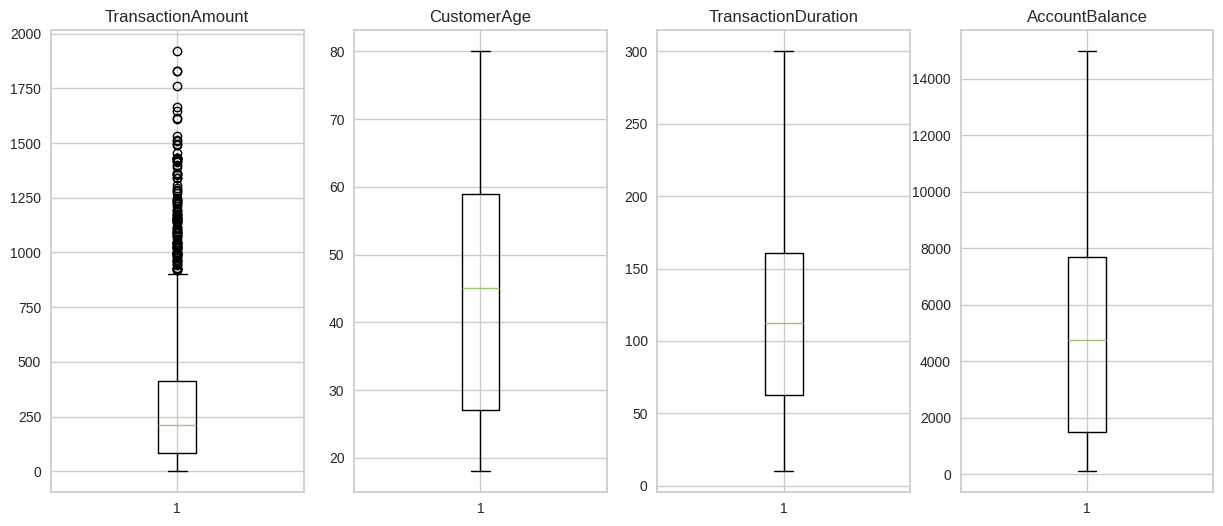

In [ ]:
# Visualisasi Kolom Numerik
num_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]

fig, axes = plt.subplots(1, len(num_cols), figsize=(15,6))

for i, ax in enumerate(axes.reshape(-1)):
  ax.boxplot(df_raw[num_cols[i]])
  ax.set_title(num_cols[i])

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Drop duplikat
df_clean = df_raw.copy()
df_clean = df_clean.drop_duplicates()
df_clean.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Columns: 16 entries, TransactionID to PreviousTransactionDate
dtypes: float64(2), int64(3), object(11)
memory usage: 314.1+ KB


In [ ]:
# Ubah tipe data
df_clean = df_clean.astype({
    "TransactionDate": "datetime64[s]",
    "PreviousTransactionDate": "datetime64[s]"
})

In [ ]:
# One Hot Encoding
df_cat = pd.get_dummies(df_clean[cat_cols], columns=cat_cols)
df_clean = df_clean[num_cols].join(df_cat)
df_clean

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,70,81,5112.21,False,True,True,False,False,True,False,False,False
1,376.24,68,141,13758.91,False,True,True,False,False,True,False,False,False
2,126.29,19,56,1122.35,False,True,False,False,True,False,False,False,True
3,184.50,26,25,8569.06,False,True,False,False,True,False,False,False,True
4,13.45,26,198,7429.40,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,33,109,12690.79,True,False,False,True,False,True,False,False,False
2508,251.54,48,177,254.75,False,True,False,True,False,True,False,False,False
2509,28.63,56,146,3382.91,False,True,False,True,False,False,False,True,False
2510,185.97,23,19,1776.91,False,True,False,False,True,False,False,False,True


In [ ]:
df_scaled = df_clean.copy()
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])
df_scaled

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,1.423718,-0.552443,-0.000537,False,True,True,False,False,True,False,False,False
1,0.269440,1.311287,0.305314,2.216472,False,True,True,False,False,True,False,False,False
2,-0.586882,-1.443277,-0.909842,-1.023534,False,True,False,False,True,False,False,False,True
3,-0.387456,-1.049768,-1.353017,0.885797,False,True,False,False,True,False,False,False,True
4,-0.973468,-1.049768,1.120184,0.593589,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1.913802,-0.656259,-0.152156,1.942606,True,False,False,True,False,True,False,False,False
2508,-0.157779,0.186975,0.819969,-1.245986,False,True,False,True,False,True,False,False,False
2509,-0.921462,0.636700,0.376794,-0.443928,False,True,False,True,False,False,False,True,False
2510,-0.382420,-1.218415,-1.438793,-0.855705,False,True,False,False,True,False,False,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

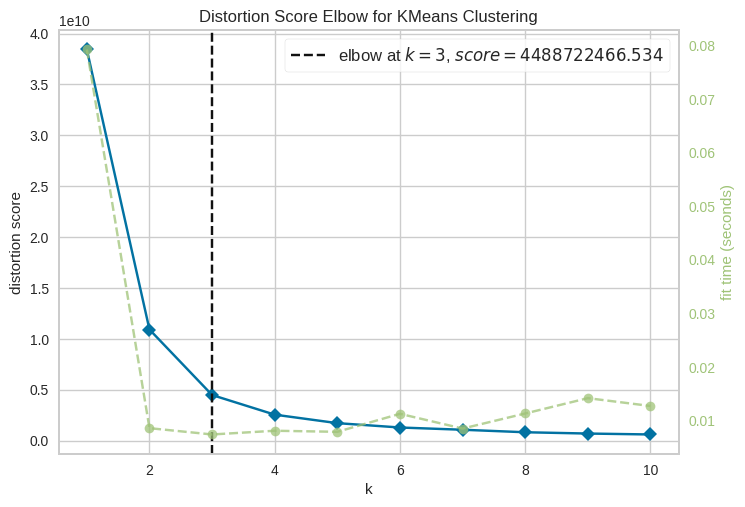

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
X = df_clean[num_cols]
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(X)
visualizer.show()

In [ ]:
model = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
print("Silhouette Score:", silhouette_score(X, model.fit_predict(X)))

Silhouette Score: 0.6232284973438191


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
temp_df = X.copy(deep=True)
temp_df["label"] = model.labels_

fig = px.scatter_matrix(temp_df,dimensions=num_cols,color="label")
fig.update_traces(diagonal_visible=False)
fig.show()

![image.png](attachment:af418bf8-d46d-49d1-8060-735c074f472f.png)

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_final = df_raw.copy()
df_final["label"] = model.labels_
df_final

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,label
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29,0
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42,1
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39,1
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_final.groupby("label").aggregate({
    "AccountBalance": ["mean","min","max","count"],
    "TransactionAmount": ["mean","min","max"],
    "CustomerAge": ["mean","min","max"],
    "TransactionDuration": ["mean","min","max"],
    })

AccountBalance                          TransactionAmount        \
                mean      min       max count              mean   min   
label                                                                   
0       11572.834329  9033.87  14977.99   425        305.169459  1.14   
1        1569.461721   101.25   4026.03  1145        308.255083  0.26   
2        6509.172813  4040.32   9028.49   942        281.217070  0.32   

               CustomerAge         TransactionDuration           
           max        mean min max                mean min  max  
label                                                            
0      1919.11   47.487059  18  70          123.150588  11  300  
1      1830.00   37.786026  18  80          119.488210  10  300  
2      1607.55   51.777070  18  80          118.249469  10  299


## 🔍 Interpretasi Cluster

### 🔹 Cluster 0:
Cluster ini didapatkan karena:

- **AccountBalance** memiliki nilai rata-rata $11,572.83 dengan batas minimum $9,033.87 dan maksimum $14,977.99.
- **TransactionAmount** rata-rata $305.17, dengan nilai minimum $1.14 dan maksimum $1,919.11.
- **CustomerAge** memiliki rata-rata usia 47.49 tahun, dengan rentang antara 18 hingga 70 tahun.
- **TransactionDuration** rata-rata 123.15 detik, dengan durasi antara 11 hingga 300 detik.

**Analisis:** Cluster ini mencakup pelanggan dengan saldo akun tinggi, usia matang, dan transaksi bernilai besar, menunjukkan potensi kelompok nasabah prioritas atau mapan.

---

### 🔹 Cluster 1:
Cluster ini didapatkan karena:

- **AccountBalance** memiliki rata-rata hanya $1,569.46, dengan rentang $101.25 hingga $4,026.03.
- **TransactionAmount** rata-rata $308.26, dengan minimum $0.26 dan maksimum $1,830.00.
- **CustomerAge** rata-rata lebih muda, yaitu 37.79 tahun, dengan rentang antara 18 hingga 80 tahun.
- **TransactionDuration** rata-rata 119.49 detik.

**Analisis:** Cluster ini mewakili pelanggan dengan saldo rendah namun melakukan transaksi bernilai sedang, kemungkinan pelanggan baru atau menengah.

---

### 🔹 Cluster 2:
Cluster ini didapatkan karena:

- **AccountBalance** memiliki rata-rata $6,509.17 dengan nilai minimum $4,040.32 dan maksimum $9,028.49.
- **TransactionAmount** lebih rendah dengan rata-rata $281.22, minimum $0.32 dan maksimum $1,607.55.
- **CustomerAge** tertinggi di antara semua cluster, rata-rata 51.78 tahun.
- **TransactionDuration** cenderung stabil di kisaran 118.25 detik.

**Analisis:** Cluster ini merepresentasikan pelanggan senior dengan saldo menengah dan aktivitas transaksi sedang.

---

## 📊 Visualisasi Pendukung

### 1. Distribusi Account Balance per Cluster
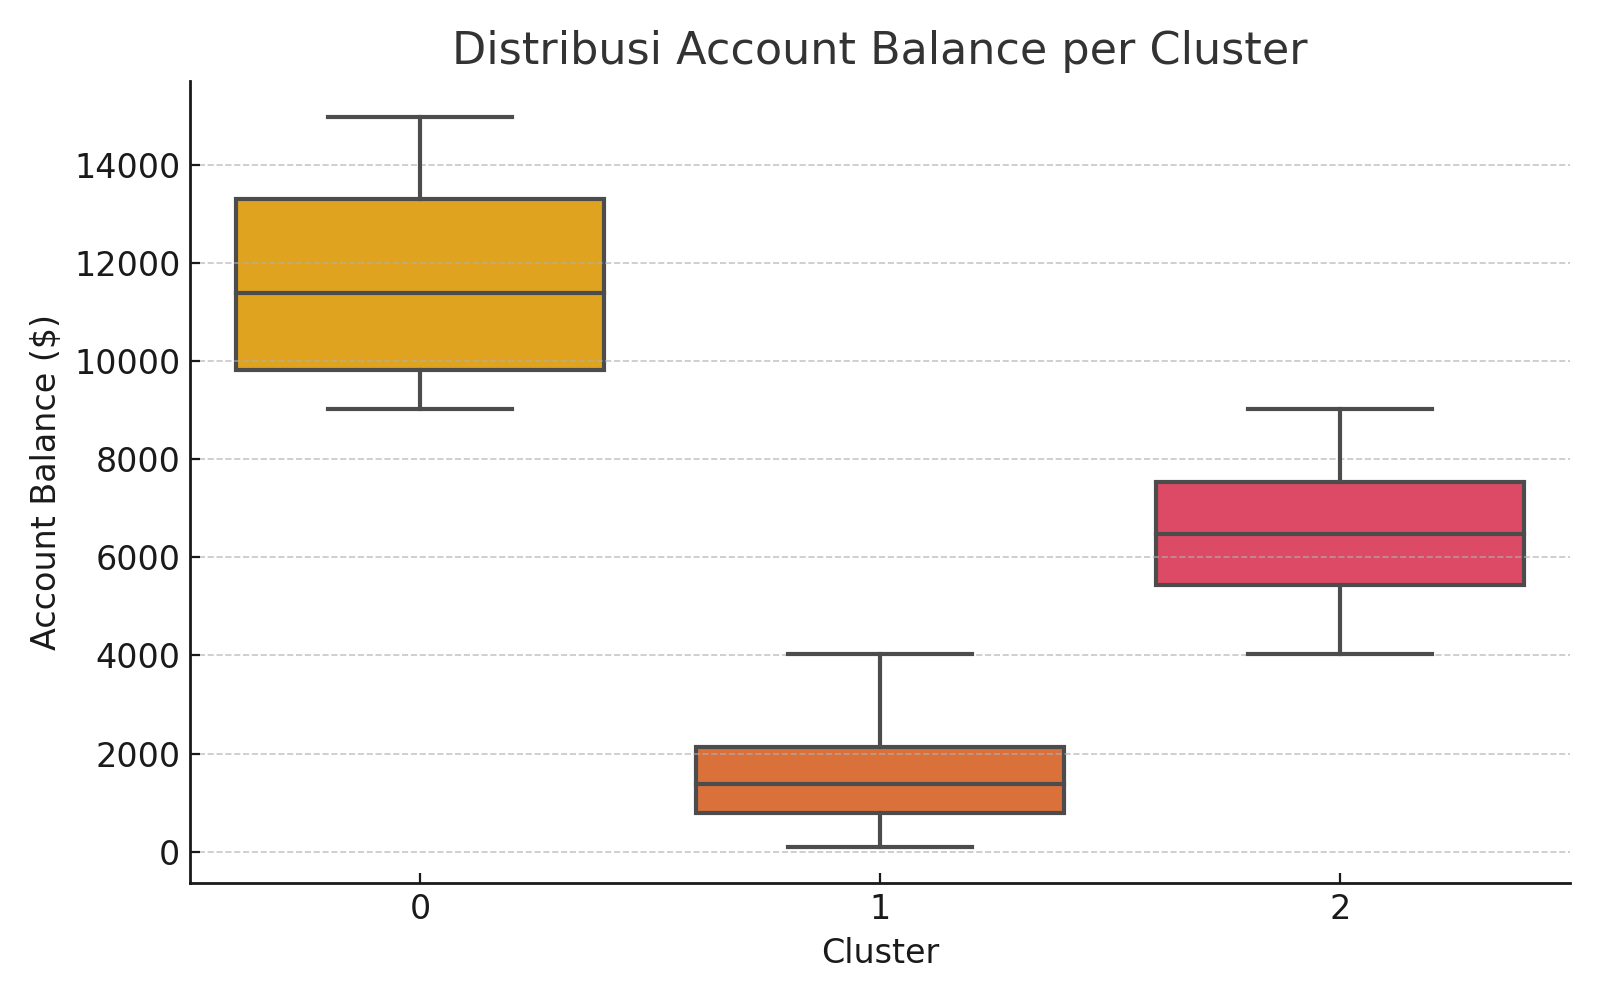
### 2. Korelasi Transaction Amount vs Account Balance per Cluster
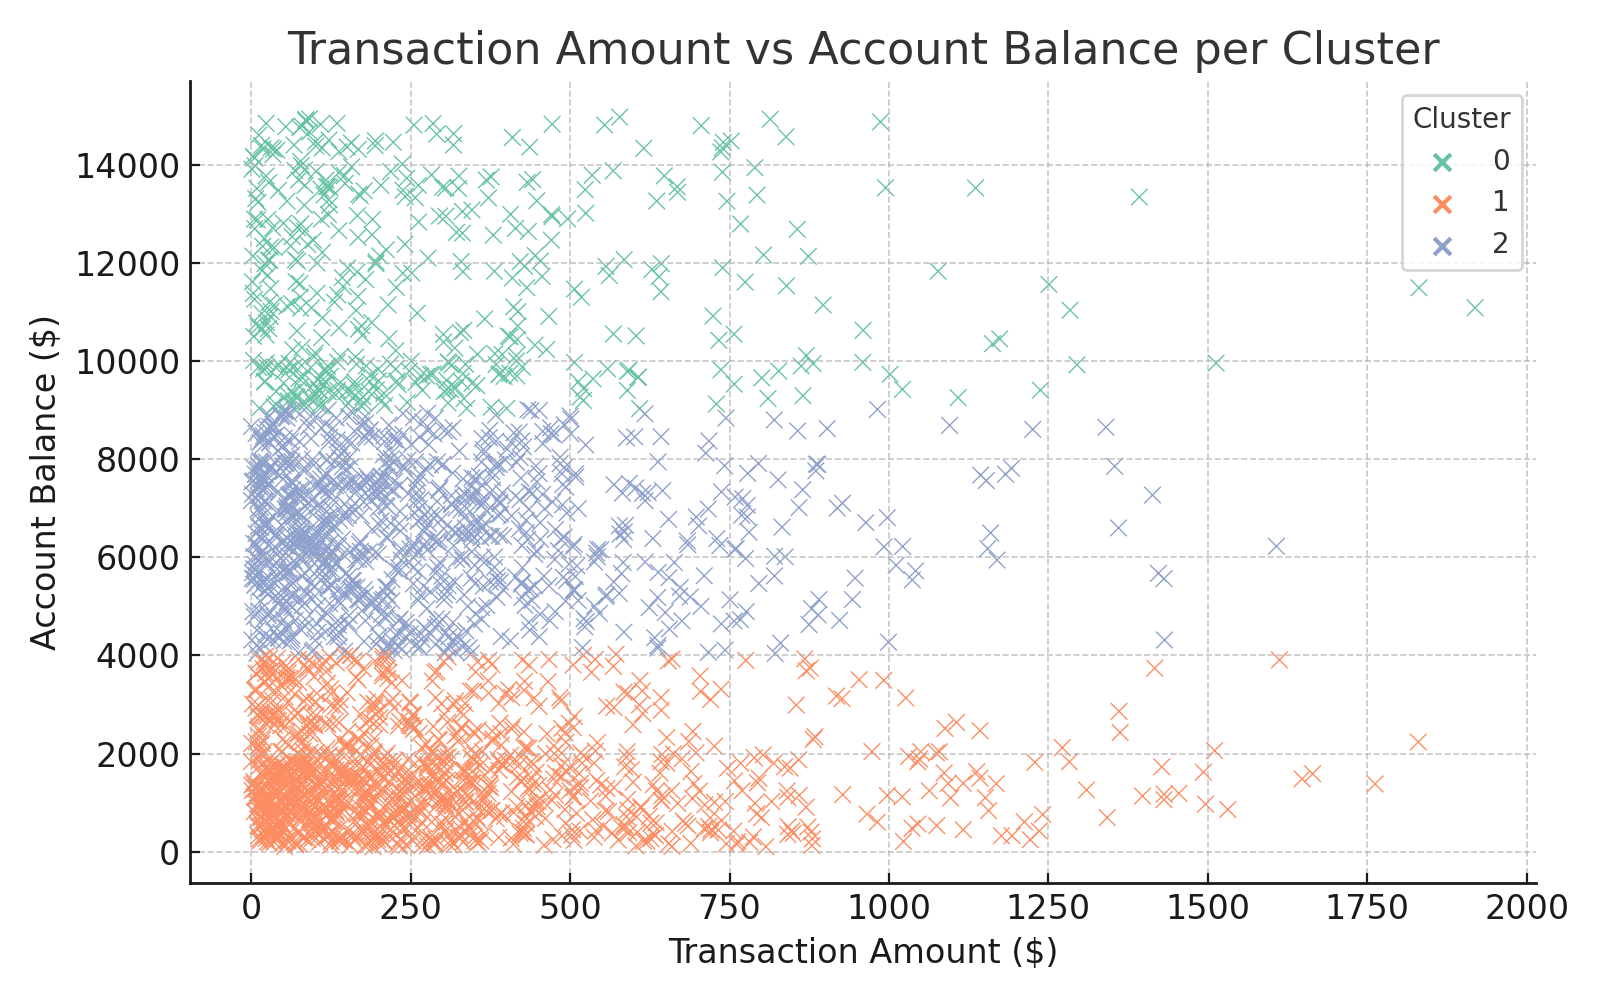

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_final.to_csv("Dataset_inisiasi.csv",index=False)